# Preprocess 

## import

In [1]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import mlflow
import mlflow.tensorflow
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense,LSTM,Dropout # type: ignore
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.callbacks import ModelCheckpoint # type: ignore
import json
import keras_tuner
import keras_tuner as kt
from keras_tuner import Hyperband
from keras_tuner import RandomSearch
plt.style.use('fivethirtyeight')
import os

2025-03-31 13:07:51.313276: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-31 13:07:51.319592: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743413871.326802   16671 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743413871.328956   16671 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-31 13:07:51.336545: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [ ]:
## Params

In [ ]:
EPOCHS = 30
BATCH_SIZE = 64

## Creating Project Path and Reading csv

In [4]:
 df = pd.read_csv('data/btcusd_1-min_data.csv')
df

,Timestamp,Open,High,Low,Close,Volume,datetime
0,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:01:00+00:00
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:02:00+00:00
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:03:00+00:00
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:04:00+00:00
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:05:00+00:00
...,...,...,...,...,...,...,...
6944795,1.742169e+09,82554.00,82554.00,82554.00,82554.00,0.072000,NaN
6944796,1.742169e+09,82584.00,82615.00,82584.00,82615.00,0.194670,NaN
6944797,1.742169e+09,82555.00,82555.00,82555.00,82555.00,0.002680,NaN
6944798,1.742170e+09,82555.00,82555.00,82555.00,82555.00,0.000000,NaN


## Handling Null Values

In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df.set_index('Timestamp', inplace=True)
df1=df.interpolate()
df1=df1.iloc[::15]
df = df1
df

/tmp/ipykernel_16671/964551746.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df1=df.interpolate()


,Open,High,Low,Close,Volume,datetime
Timestamp,,,,,,
2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:01:00+00:00
2012-01-01 10:16:00,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:16:00+00:00
2012-01-01 10:31:00,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:31:00+00:00
2012-01-01 10:46:00,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:46:00+00:00
2012-01-01 11:01:00,4.58,4.58,4.58,4.58,0.000000,2012-01-01 11:01:00+00:00
...,...,...,...,...,...,...
2025-03-16 22:51:00,82279.00,82289.00,82279.00,82279.00,1.062527,NaN
2025-03-16 23:06:00,82052.00,82052.00,81983.00,82001.00,10.763381,NaN
2025-03-16 23:21:00,82356.00,82356.00,82356.00,82356.00,0.085000,NaN


## Ploting Close Price

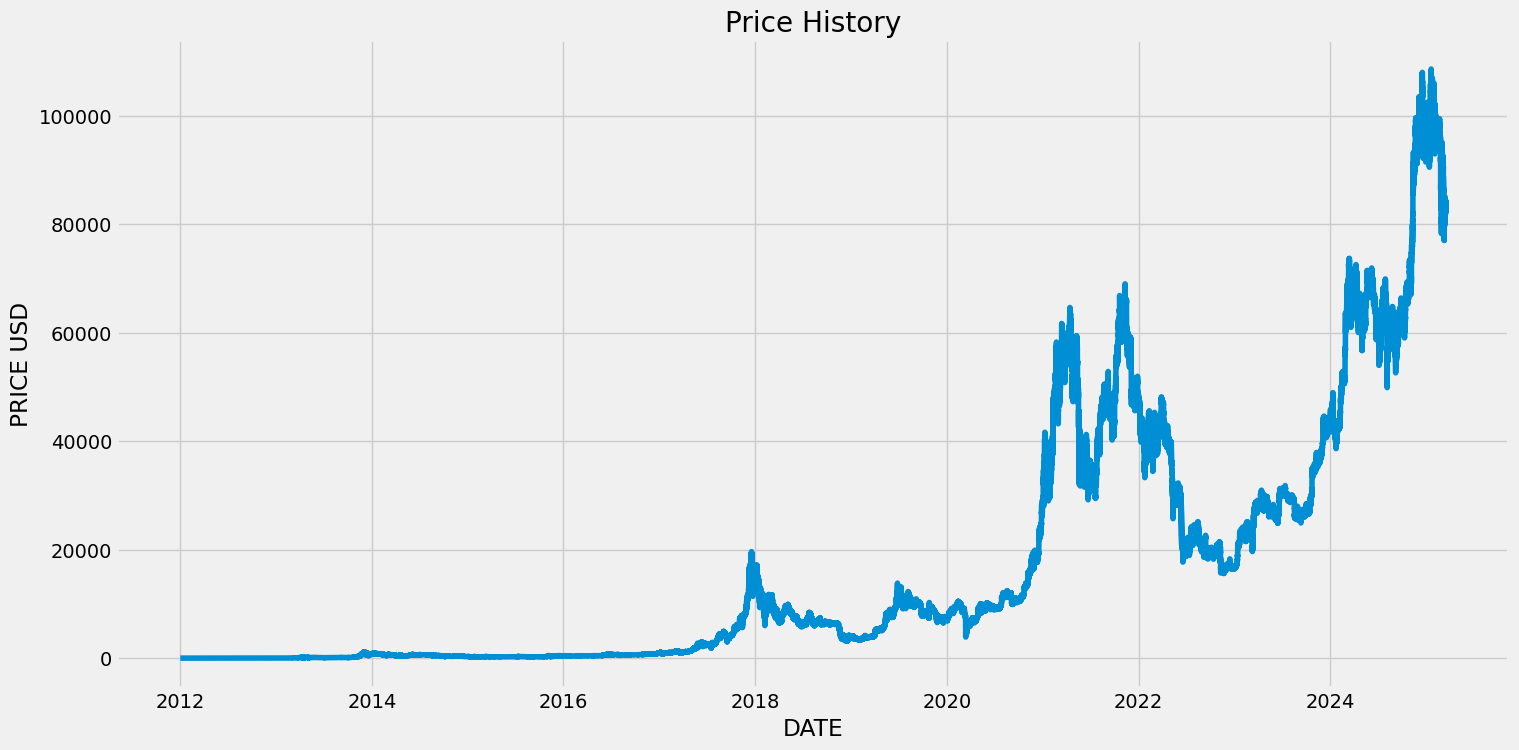

In [6]:
plt.figure(figsize=(16,8))
plt.title('Price History')
plt.plot(df['Close'])
plt.xlabel('DATE')
plt.ylabel('PRICE USD')
plt.show()

## Scaling Spliting 

In [8]:
# Define features and target
target_col = 'Close'
features = ['Open', 'High', 'Low' ]

"""
data is df
target_col is target_column
lookback_steps is how many steps enters to the model ad input
shifting_lookback_steps is how many steps would shift for next input
shifting_target_steps is how many steps after selecting lookback_steps is tartget 
            , zero means next step after lookback_steps is target
"""
def create_sequences(data, target_col, lookback_steps, shifting_lookback_steps, shifting_target_steps=0):
    X, y = [], []
    for i in range(0, math.ceil((len(data) - lookback_steps)/shifting_lookback_steps)-shifting_target_steps):
        X.append(data.iloc[i*shifting_lookback_steps:(shifting_lookback_steps*i) + lookback_steps][features].values)
        y.append(data.iloc[(i*shifting_lookback_steps)+lookback_steps+shifting_target_steps][target_col])
    return np.array(X), np.array(y)


# Create sequences first
X, y = create_sequences(df, target_col, lookback_steps=10, shifting_lookback_steps=1, shifting_target_steps=0)  # Adjust time steps as needed

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = X[:-100], X[-100:], y[:-100], y[-100:]

# Initialize scalers for X (features) and y (target)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

# Transform the validation data
X_val_scaled = scaler_X.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
y_val_scaled = scaler_y.transform(y_val.reshape(-1, 1))

# Block Diagram of Custom LSTM Layer

## CustomLSTMCell 

1. **Input Concatenation**:
    - Concatenate the input \( x_t \) and the hidden state \( h_t \).
    - Concatenate the input \( x_t \) and the feature state \( fe_t \).
    - Concatenate the input \( x_t \) and the cell state \( c_t \).

2. **Forget Gate \( f_t \)**:
    - Calculate \( f_t \) using the concatenated input and hidden state.
    - \( f_t = \text{sigmoid}(W_f \cdot [x_t, h_t] + b_f) \)

3. **Input Gate \( i_t \)**:
    - Calculate \( i_t \) using the concatenated input and hidden state.
    - \( i_t = \text{sigmoid}(W_i \cdot [x_t, h_t] + b_i) \)

4. **Cell Candidate \( \hat{c}_t \)**:
    - Calculate \( \hat{c}_t \) using the concatenated input and hidden state.
    - \( \hat{c}_t = \text{tanh}(W_c \cdot [x_t, h_t] + b_c) \)

5. **Output Gate \( o_t \)**:
    - Calculate \( o_t \) using the concatenated input and hidden state.
    - \( o_t = \text{sigmoid}(W_o \cdot [x_t, h_t] + b_o) \)

6. **Cell State Update**:
    - Update the cell state \( c_t \) using the forget gate and input gate.
    - \( c_t = f_t \cdot c_t + i_t \cdot \hat{c}_t \)

7. **Hidden State Update**:
    - Update the hidden state \( h_t \) using the output gate.
    - \( h_t = o_t \cdot \text{tanh}(c_t) \)

8. **Feature State Updates**:
    - Compute intermediate feature states \( \hat{fe}_t \) and \( fe_h \).
    - Calculate \( B \) using the concatenated input and cell state.
    - Compute additional feature states \( fe_1 \) and \( fe_2 \).
    - Calculate the final feature state \( fe_t \) using \( fe_1 \), \( fe_2 \), and a recurrent feature \( fe_f \).

## CustomLSTM

1. **Initialize States**:
    - Initialize \( h_t \), \( c_t \), and \( fe_t \) to zeros.

2. **Sequence Processing**:
    - Transpose the input sequence for time-step-wise processing.
    - Iterate over each time step:
        - Update \( h_t \), \( c_t \), and \( fe_t \) using the `CustomLSTMCell`.

3. **Output Handling**:
    - If `return_sequences` is True, return the sequence of hidden states.
    - If `return_state` is True, return the final states \( h_t \) and \( c_t \).

## Block Diagram Illustration

```plaintext
                            CustomLSTM Layer
  ┌─────────────────────────────────────────────────────┐
  │                                                     │
  │  Initialize h_t, c_t, fe_t to zeros                 │
  │                                                     │
  │  Inputs (batch_size, seq_length, input_dim)         │
  │     │                                               │
  │     │                                               │
  │     ▼                                               │
  │  Transpose Inputs (seq_length, batch_size, input_dim)│
  │     │                                               │
  │     │                                               │
  │     ▼                                               │
  │  For each time step:                                │
  │     │                                               │
  │     ├──────────────┬───────────────┬───────────────┤
  │     │              │               │               │
  │     ▼              ▼               ▼               ▼
  │  ┌──────────────────────────────────────────────┐  │
  │  │                CustomLSTMCell                │  │
  │  │                                              │  │
  │  │  Concatenate x_t and h_t, fe_t, c_t          │  │
  │  │                                              │  │
  │  │  Forget Gate: f_t                            │  │
  │  │  Input Gate: i_t                             │  │
  │  │  Cell Candidate: c_hat_t                     │  │
  │  │  Output Gate: o_t                            │  │
  │  │                                              │  │
  │  │  Update c_t and h_t                          │  │
  │  │                                              │  │
  │  │  Feature State Updates: fe_t                 │  │
  │  └──────────────────────────────────────────────┘  │
  │     │                                               │
  │     │                                               │
  │     ▼                                               │
  │  Collect Outputs                                    │
  │                                                     │
  │  Final Outputs:                                     │
  │  - Sequence of h_t if return_sequences=True         │
  │  - Final states if return_state=True                │
  │                                                     │
  └─────────────────────────────────────────────────────┘


## FLSTM CELL

In [9]:

class CustomLSTMCell(tf.keras.layers.Layer):
    def __init__(self, units, activation='tanh', recurrent_activation='sigmoid', use_bias=True, recurrent_dropout=0.0, **kwargs):
        super(CustomLSTMCell, self).__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)
        self.recurrent_activation = tf.keras.activations.get(recurrent_activation)
        self.use_bias = use_bias
        self.recurrent_dropout = recurrent_dropout

    def build(self, input_shape):
        self.input_dim = input_shape[-1] # features number
        
        self.W_f = self.add_weight(shape=(self.input_dim + self.units, self.units), initializer='random_normal', name='W_f')
        self.b_f = self.add_weight(shape=(self.units,), initializer='zeros', name='b_f') if self.use_bias else None
        
        self.W_i = self.add_weight(shape=(self.input_dim + self.units, self.units), initializer='random_normal', name='W_i')
        self.b_i = self.add_weight(shape=(self.units,), initializer='zeros', name='b_i') if self.use_bias else None
        
        self.W_c = self.add_weight(shape=(self.input_dim + self.units, self.units), initializer='random_normal', name='W_c')
        self.b_c = self.add_weight(shape=(self.units,), initializer='zeros', name='b_c') if self.use_bias else None
        
        self.W_o = self.add_weight(shape=(self.input_dim + self.units, self.units), initializer='random_normal', name='W_o')
        self.b_o = self.add_weight(shape=(self.units,), initializer='zeros', name='b_o') if self.use_bias else None

        self.W_s = self.add_weight(shape=(self.input_dim + self.units, self.units), initializer='random_normal', name='W_s')
        self.b_s = self.add_weight(shape=(self.units,), initializer='zeros', name='b_s') if self.use_bias else None

        self.W_ff = self.add_weight(shape=(self.units, self.units), initializer='random_normal', name='W_ff')
        self.b_ff = self.add_weight(shape=(self.units,), initializer='zeros', name='b_ff') if self.use_bias else None
        
        self.W_fe = self.add_weight(shape=(self.units, self.units), initializer='random_normal', name='W_fe')
        self.b_fe = self.add_weight(shape=(self.units,), initializer='zeros', name='b_fe') if self.use_bias else None
        
        self.W_z = self.add_weight(shape=(self.units, self.units), initializer='random_normal', name='W_z')
        self.b_z = self.add_weight(shape=(self.units,), initializer='zeros', name='b_z') if self.use_bias else None
        
        self.W_B = self.add_weight(shape=(self.input_dim + self.units, self.units), initializer='random_normal', name='W_B')
        self.b_B = self.add_weight(shape=(self.units,), initializer='zeros', name='b_B') if self.use_bias else None
        
        

    def call(self, inputs, states, training=None):
        h_t, c_t, fe_t = states
        if 0 < self.recurrent_dropout < 1 and training:
            h_t = tf.nn.dropout(h_t, rate=self.recurrent_dropout)
        
        # print(inputs)
        # print(f'h_t.shape={h_t.shape}')
        # print(f'fe_t.shape={fe_t.shape}')
        # print(f'c_t.shape={c_t.shape}')
        # print(f'self.w_s.shape={self.W_s.shape}')
        concat_h_t = tf.concat([inputs, h_t], axis=-1)
        concat_fe_t = tf.concat([inputs, fe_t], axis=-1)
        concat_c_t = tf.concat([inputs, c_t], axis=-1)
        fe_hat = tf.matmul(concat_fe_t,self.W_s) + (self.b_s if self.use_bias else 0)
        fe_h= fe_hat + tf.matmul(concat_h_t,(1-self.W_s))+ (self.b_s if self.use_bias else 0)
        
        # print(f'fe_h_hat.shape={fe_h.shape}')
        # print('cell_here4')

        B_hat= tf.matmul(concat_c_t, self.W_B) + (self.b_B if self.use_bias else 0)
        f_t = self.recurrent_activation(tf.matmul(concat_h_t, self.W_f) + (self.b_f if self.use_bias else 0))
        i_t = self.recurrent_activation(tf.matmul(concat_h_t, self.W_i) + (self.b_i if self.use_bias else 0))
        c_hat_t = self.activation(tf.matmul(concat_h_t, self.W_c) + (self.b_c if self.use_bias else 0))
        o_t = self.recurrent_activation(tf.matmul(concat_h_t, self.W_o) + (self.b_o if self.use_bias else 0))
        # print('cell_here6')
        # print(B_hat)
        fe_1 = self.recurrent_activation(tf.matmul(B_hat,self.W_z) + (self.b_z if self.use_bias else 0))
        fe_2 = self.activation(tf.matmul(B_hat,self.W_fe) + (self.b_fe if self.use_bias else 0))
        # print('cell_here8')
        # print(f'fe_1{fe_1}')
        # print(f'fe_2{fe_2}')

        fe_f = tf.matmul(f_t, self.W_ff) + (self.b_ff if self.use_bias else 0)

        # print('code_here9')
        c_t_next = f_t * c_t + i_t * c_hat_t
        h_t_next = o_t * self.activation(c_t_next)
        # print('code_here10')
        fe_1_2=fe_1 * fe_2
        fe_ff = fe_t * fe_f
        # print ('code_here 11')
        # print (fe_1_2 ,fe_ff)
        fe_t_next=fe_1_2+fe_ff
        
        return h_t_next, [h_t_next, c_t_next, fe_t_next]
    

    def get_config(self):
        config = super(CustomLSTMCell, self).get_config()
        config.update({
            'units': self.units,
            'activation': tf.keras.activations.serialize(self.activation),
            'recurrent_activation': tf.keras.activations.serialize(self.recurrent_activation),
            'use_bias': self.use_bias,
            'recurrent_dropout': self.recurrent_dropout,
        })
        return config


class CustomLSTM(tf.keras.layers.Layer):
    def __init__(self, units, activation='tanh', recurrent_activation='sigmoid', use_bias=True, return_sequences=False, return_state=False, recurrent_dropout=0.0, unroll=False, **kwargs):
        super(CustomLSTM, self).__init__(**kwargs)
        self.units = units
        self.return_sequences = return_sequences
        self.return_state = return_state
        self.unroll = unroll
        self.cell = CustomLSTMCell(units, activation=activation, recurrent_activation=recurrent_activation, use_bias=use_bias, recurrent_dropout=recurrent_dropout)
        
    def call(self, inputs, training=None):
        batch_size = tf.shape(inputs)[0]
        seq_length = tf.shape(inputs)[1]
        
        h_t = tf.zeros((batch_size, self.units))
        c_t = tf.zeros((batch_size, self.units))
        fe_t = tf.zeros((batch_size, self.units))
        
        states = [h_t, c_t, fe_t]
        
        inputs_transposed = tf.transpose(inputs, [1, 0, 2])
        
        def step(prev_states, x_t):
            
            h_t, c_t, fe_t = prev_states
            
            h_t, [h_t, c_t, fe_t] = self.cell(x_t, [h_t, c_t, fe_t], training=training)
            
            return [h_t, c_t, fe_t]

        if self.unroll:
            # Unroll the loop manually if unroll=True
            outputs = []
            for i in range(seq_length):
                states = step(states, inputs_transposed[i])
                outputs.append(states[0])
            outputs = tf.stack(outputs, axis=0)
            
        else:
            states = tf.scan(step, inputs_transposed, initializer=states, parallel_iterations=1)
            outputs = states[0]
            
        
        outputs = tf.transpose(outputs, [1, 0, 2])
        
        final_states = [states[0][-1], states[1][-1]]
        
        if self.return_sequences:
            if self.return_state:
                return outputs, final_states
            return outputs
        
        if self.return_state:
            return outputs[:, -1, :], final_states
        return outputs[:, -1, :]
    
    def get_config(self):
        config = super(CustomLSTM, self).get_config()
        config.update({
            'units': self.units,
            'activation': tf.keras.activations.serialize(self.cell.activation),
            'recurrent_activation': tf.keras.activations.serialize(self.cell.recurrent_activation),
            'use_bias': self.cell.use_bias,
            'return_sequences': self.return_sequences,
            'return_state': self.return_state,
            'recurrent_dropout': self.cell.recurrent_dropout,
            'unroll': self.unroll,
        })
        return config


# Training

## FLSTM Training

In [15]:

checkpoint_cb = ModelCheckpoint(
    filepath= f"./model_epoch_{{epoch:02d}}_val_loss_{{val_loss:.2f}}.keras",
    save_best_only=True,
    monitor='val_mse',  # Change 'val_loss' to the primary metric you want to monitor
    mode='min'
)

inputs = tf.keras.Input(shape=(X_train_scaled.shape[1],X_train_scaled.shape[2]))
x = CustomLSTM(160, return_sequences=True)(inputs)
x = Dropout(0.2)(x)
x = Dense(164)(x)
x = CustomLSTM(240, return_sequences=True)(x)
x = Dropout(0.2)(x)
x = CustomLSTM(240)(x)
x = Dropout(0.2)(x)
x = Dense(1)(x)

model_flstm = tf.keras.Model(inputs, x)
model_flstm.summary()
model_flstm.compile(optimizer='adam', loss='mse', metrics=['mae','mape','mse','msle','cosine_similarity'])

# Enable MLflow autologging
mlflow.tensorflow.autolog()

# Start an MLflow run
with mlflow.start_run() as run:
    history_flstm=model_flstm.fit(X_train_scaled,
                                  y_train_scaled,batch_size=128,
                                  epochs=20,
                                  validation_data=(X_val_scaled,y_val_scaled),
                                  callbacks=[checkpoint_cb])

    # Save the training history to a JSON file
    with open(f'./training_history.json', 'w') as f:
        json.dump(history_flstm.history, f)
        
    # Log and register the model with MLflow
    mlflow.tensorflow.log_model(model=model_flstm, artifact_path="data/model/flstm", registered_model_name="FLSTM_Model")



Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 10, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_lstm_9 (CustomLSTM)      │ (None, 10, 160)        │       234,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 10, 160)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10, 164)        │        26,404 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_lstm_10 (CustomLSTM)     │ (None, 10, 240)        │       756,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 10, 240)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_lstm_11 (CustomLSTM)     │ (None, 240)            │       866,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 240)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,884,245 (7.19 MB)

 Trainable params: 1,884,245 (7.19 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - cosine_similarity: 0.8130 - loss: 7.2876e-04 - mae: 0.0100 - mape: 2820.1421 - mse: 7.2876e-04 - msle: 4.0245e-04

3617/3617 ━━━━━━━━━━━━━━━━━━━━ 57s 14ms/step - cosine_similarity: 0.8130 - loss: 7.2862e-04 - mae: 0.0100 - mape: 2819.9907 - mse: 7.2862e-04 - msle: 4.0237e-04 - val_cosine_similarity: 1.0000 - val_loss: 5.8475e-04 - val_mae: 0.0239 - val_mape: 3.1102 - val_mse: 5.8475e-04 - val_msle: 1.8427e-04
Epoch 2/20
3614/3617 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - cosine_similarity: 0.7566 - loss: 1.1536e-04 - mae: 0.0067 - mape: 2761.1274 - mse: 1.1536e-04 - msle: 5.1897e-05

3617/3617 ━━━━━━━━━━━━━━━━━━━━ 48s 13ms/step - cosine_similarity: 0.7566 - loss: 1.1535e-04 - mae: 0.0067 - mape: 2761.1016 - mse: 1.1535e-04 - msle: 5.1894e-05 - val_cosine_similarity: 1.0000 - val_loss: 6.7753e-05 - val_mae: 0.0076 - val_mape: 0.9810 - val_mse: 6.7753e-05 - val_msle: 2.1707e-05
Epoch 3/20
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 48s 13ms/step - cosine_similarity: 0.7603 - loss: 9.5843e-05 - mae: 0.0063 - mape: 2707.6953 - mse: 9.5843e-05 - msle: 4.3919e-05 - val_cosine_similarity: 1.0000 - val_loss: 4.5940e-04 - val_mae: 0.0211 - val_mape: 2.7386 - val_mse: 4.5940e-04 - val_msle: 1.4835e-04
Epoch 4/20
3615/3617 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - cosine_similarity: 0.7587 - loss: 9.2235e-05 - mae: 0.0062 - mape: 2736.2686 - mse: 9.2235e-05 - msle: 4.2735e-05

3617/3617 ━━━━━━━━━━━━━━━━━━━━ 48s 13ms/step - cosine_similarity: 0.7587 - loss: 9.2234e-05 - mae: 0.0062 - mape: 2736.2866 - mse: 9.2234e-05 - msle: 4.2734e-05 - val_cosine_similarity: 1.0000 - val_loss: 2.0368e-05 - val_mae: 0.0034 - val_mape: 0.4429 - val_mse: 2.0368e-05 - val_msle: 6.5190e-06
Epoch 5/20
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 49s 13ms/step - cosine_similarity: 0.7593 - loss: 8.9234e-05 - mae: 0.0061 - mape: 2750.4150 - mse: 8.9234e-05 - msle: 4.1518e-05 - val_cosine_similarity: 1.0000 - val_loss: 1.4175e-04 - val_mae: 0.0112 - val_mape: 1.4567 - val_mse: 1.4175e-04 - val_msle: 4.5517e-05
Epoch 6/20
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 48s 13ms/step - cosine_similarity: 0.7610 - loss: 8.7406e-05 - mae: 0.0061 - mape: 2765.5591 - mse: 8.7406e-05 - msle: 4.0522e-05 - val_cosine_similarity: 1.0000 - val_loss: 2.4151e-04 - val_mae: 0.0150 - val_mape: 1.9518 - val_mse: 2.4151e-04 - val_msle: 7.7723e-05
Epoch 7/20
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 48s 13ms/step - cosine_similarity: 0.7587 

3617/3617 ━━━━━━━━━━━━━━━━━━━━ 49s 14ms/step - cosine_similarity: 0.7610 - loss: 7.9611e-05 - mae: 0.0058 - mape: 2661.9089 - mse: 7.9611e-05 - msle: 3.6965e-05 - val_cosine_similarity: 1.0000 - val_loss: 1.5648e-05 - val_mae: 0.0031 - val_mape: 0.4014 - val_mse: 1.5648e-05 - val_msle: 5.0102e-06
Epoch 12/20
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 45s 12ms/step - cosine_similarity: 0.7626 - loss: 7.5308e-05 - mae: 0.0056 - mape: 2545.1262 - mse: 7.5308e-05 - msle: 3.5023e-05 - val_cosine_similarity: 1.0000 - val_loss: 2.6936e-05 - val_mae: 0.0042 - val_mape: 0.5444 - val_mse: 2.6936e-05 - val_msle: 8.6080e-06
Epoch 13/20
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 47s 13ms/step - cosine_similarity: 0.7615 - loss: 7.6952e-05 - mae: 0.0057 - mape: 2555.9463 - mse: 7.6952e-05 - msle: 3.5968e-05 - val_cosine_similarity: 1.0000 - val_loss: 8.2898e-05 - val_mae: 0.0084 - val_mape: 1.0875 - val_mse: 8.2898e-05 - val_msle: 2.6388e-05
Epoch 14/20
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 48s 13ms/step - cosine_similarity: 0.76

3617/3617 ━━━━━━━━━━━━━━━━━━━━ 51s 14ms/step - cosine_similarity: 0.7664 - loss: 7.0431e-05 - mae: 0.0055 - mape: 2509.0049 - mse: 7.0431e-05 - msle: 3.2896e-05 - val_cosine_similarity: 1.0000 - val_loss: 1.4843e-05 - val_mae: 0.0028 - val_mape: 0.3621 - val_mse: 1.4843e-05 - val_msle: 4.7535e-06
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


2025/03/31 17:35:12 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpcc49qz89/model, flavor: tensorflow). Fall back to return ['tensorflow==2.18.0', 'cloudpickle==3.1.0']. Set logging level to DEBUG to see the full traceback. 
2025/03/31 17:35:13 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/03/31 17:35:15 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpsl6jp9lv/model, flavor: tensorflow). Fall back to return ['tensorflow==2.18.0', 'cloudpickle==3.1.0']. Set logging level to DEBUG to see the full traceback. 
2025/03/31 17:35:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter whe

## LSTM Training

In [16]:

# Define the model checkpoint callback
checkpoint_cb = ModelCheckpoint(
    filepath=f"./model_epoch_{{epoch:02d}}_val_loss_{{val_loss:.2f}}.keras",
    save_best_only=True,
    monitor='val_mse',
    mode='min'
)

# Build your LSTM model
inputs = tf.keras.Input(shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]))
x = tf.keras.layers.LSTM(320, return_sequences=True)(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = Dense(164)(x)
x = tf.keras.layers.LSTM(320, return_sequences=True)(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.LSTM(320)(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1)(x)

model_lstm = tf.keras.Model(inputs, x)
model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape', 'mse', 'msle', 'cosine_similarity'])
model_lstm.summary()

# Enable MLflow autologging
mlflow.tensorflow.autolog()

# Start an MLflow run
with mlflow.start_run() as run:
    # Train the model
    history_lstm = model_lstm.fit(
        X_train_scaled, y_train_scaled, 
        batch_size=128, 
        epochs=20, 
        validation_data=(X_val_scaled, y_val_scaled), 
        callbacks=[checkpoint_cb]
    )

    # Save the training history to a JSON file
    with open(f'./training_history.json', 'w') as f:
        json.dump(history_lstm.history, f)

    # Log and register the model with MLflow
    mlflow.tensorflow.log_model(model=model_lstm, artifact_path="data/model/lstm", registered_model_name="LSTM_Model")

# This registers the model under the name "LSTM_Model" in the MLflow Model Registry


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 10, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 10, 320)        │       414,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 10, 320)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10, 164)        │        52,644 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 320)        │       620,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 10, 320)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 320)            │       820,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           321 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,908,965 (7.28 MB)

 Trainable params: 1,908,965 (7.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3614/3617 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - cosine_similarity: 0.8063 - loss: 5.2622e-04 - mae: 0.0088 - mape: 2011.6223 - mse: 5.2622e-04 - msle: 2.7585e-04

3617/3617 ━━━━━━━━━━━━━━━━━━━━ 57s 15ms/step - cosine_similarity: 0.8063 - loss: 5.2585e-04 - mae: 0.0088 - mape: 2011.8254 - mse: 5.2585e-04 - msle: 2.7564e-04 - val_cosine_similarity: 1.0000 - val_loss: 2.9841e-04 - val_mae: 0.0168 - val_mape: 2.1897 - val_mse: 2.9841e-04 - val_msle: 9.4448e-05
Epoch 2/20
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 53s 15ms/step - cosine_similarity: 0.7687 - loss: 9.7743e-05 - mae: 0.0062 - mape: 2520.5159 - mse: 9.7743e-05 - msle: 4.4101e-05 - val_cosine_similarity: 1.0000 - val_loss: 3.6433e-04 - val_mae: 0.0186 - val_mape: 2.4242 - val_mse: 3.6433e-04 - val_msle: 1.1519e-04
Epoch 3/20
3615/3617 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - cosine_similarity: 0.7696 - loss: 8.6548e-05 - mae: 0.0059 - mape: 2530.0242 - mse: 8.6548e-05 - msle: 3.9582e-05

3617/3617 ━━━━━━━━━━━━━━━━━━━━ 56s 16ms/step - cosine_similarity: 0.7696 - loss: 8.6548e-05 - mae: 0.0059 - mape: 2530.0613 - mse: 8.6548e-05 - msle: 3.9582e-05 - val_cosine_similarity: 1.0000 - val_loss: 7.1913e-05 - val_mae: 0.0076 - val_mape: 0.9912 - val_mse: 7.1913e-05 - val_msle: 2.3045e-05
Epoch 4/20
3614/3617 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - cosine_similarity: 0.7675 - loss: 8.5458e-05 - mae: 0.0060 - mape: 2707.2781 - mse: 8.5458e-05 - msle: 3.9630e-05

3617/3617 ━━━━━━━━━━━━━━━━━━━━ 55s 15ms/step - cosine_similarity: 0.7675 - loss: 8.5453e-05 - mae: 0.0060 - mape: 2707.1260 - mse: 8.5453e-05 - msle: 3.9628e-05 - val_cosine_similarity: 1.0000 - val_loss: 2.0851e-05 - val_mae: 0.0034 - val_mape: 0.4446 - val_mse: 2.0851e-05 - val_msle: 6.6751e-06
Epoch 5/20
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 53s 15ms/step - cosine_similarity: 0.7697 - loss: 7.7646e-05 - mae: 0.0057 - mape: 2429.4382 - mse: 7.7646e-05 - msle: 3.6357e-05 - val_cosine_similarity: 1.0000 - val_loss: 6.1107e-04 - val_mae: 0.0243 - val_mape: 3.1626 - val_mse: 6.1107e-04 - val_msle: 1.9252e-04
Epoch 6/20
3616/3617 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - cosine_similarity: 0.7706 - loss: 7.3682e-05 - mae: 0.0056 - mape: 2470.3850 - mse: 7.3682e-05 - msle: 3.4360e-05

3617/3617 ━━━━━━━━━━━━━━━━━━━━ 53s 15ms/step - cosine_similarity: 0.7706 - loss: 7.3681e-05 - mae: 0.0056 - mape: 2470.3726 - mse: 7.3681e-05 - msle: 3.4360e-05 - val_cosine_similarity: 1.0000 - val_loss: 1.8938e-05 - val_mae: 0.0032 - val_mape: 0.4156 - val_mse: 1.8938e-05 - val_msle: 6.0656e-06
Epoch 7/20
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 54s 15ms/step - cosine_similarity: 0.7710 - loss: 7.3716e-05 - mae: 0.0056 - mape: 2443.9514 - mse: 7.3716e-05 - msle: 3.4303e-05 - val_cosine_similarity: 1.0000 - val_loss: 1.2526e-04 - val_mae: 0.0104 - val_mape: 1.3472 - val_mse: 1.2526e-04 - val_msle: 4.0198e-05
Epoch 8/20
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 54s 15ms/step - cosine_similarity: 0.7730 - loss: 6.7910e-05 - mae: 0.0054 - mape: 2349.4673 - mse: 6.7910e-05 - msle: 3.1762e-05 - val_cosine_similarity: 1.0000 - val_loss: 7.9356e-05 - val_mae: 0.0080 - val_mape: 1.0415 - val_mse: 7.9356e-05 - val_msle: 2.5270e-05
Epoch 9/20
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 50s 14ms/step - cosine_similarity: 0.7728 

3617/3617 ━━━━━━━━━━━━━━━━━━━━ 55s 15ms/step - cosine_similarity: 0.7736 - loss: 6.2750e-05 - mae: 0.0051 - mape: 2252.7283 - mse: 6.2750e-05 - msle: 2.9356e-05 - val_cosine_similarity: 1.0000 - val_loss: 1.6163e-05 - val_mae: 0.0031 - val_mape: 0.4027 - val_mse: 1.6163e-05 - val_msle: 5.1757e-06
Epoch 12/20
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 52s 14ms/step - cosine_similarity: 0.7720 - loss: 6.2823e-05 - mae: 0.0052 - mape: 2317.5979 - mse: 6.2823e-05 - msle: 2.9397e-05 - val_cosine_similarity: 1.0000 - val_loss: 1.9864e-05 - val_mae: 0.0035 - val_mape: 0.4597 - val_mse: 1.9864e-05 - val_msle: 6.3584e-06
Epoch 13/20
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 55s 15ms/step - cosine_similarity: 0.7728 - loss: 6.0966e-05 - mae: 0.0051 - mape: 2362.6047 - mse: 6.0966e-05 - msle: 2.8724e-05 - val_cosine_similarity: 1.0000 - val_loss: 1.5327e-04 - val_mae: 0.0118 - val_mape: 1.5269 - val_mse: 1.5327e-04 - val_msle: 4.9223e-05
Epoch 14/20
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 54s 15ms/step - cosine_similarity: 0.77

3617/3617 ━━━━━━━━━━━━━━━━━━━━ 52s 14ms/step - cosine_similarity: 0.7752 - loss: 5.6658e-05 - mae: 0.0049 - mape: 2211.4695 - mse: 5.6658e-05 - msle: 2.6580e-05 - val_cosine_similarity: 1.0000 - val_loss: 1.5856e-05 - val_mae: 0.0030 - val_mape: 0.3897 - val_mse: 1.5856e-05 - val_msle: 5.0742e-06
Epoch 20/20
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 58s 16ms/step - cosine_similarity: 0.7768 - loss: 5.5453e-05 - mae: 0.0048 - mape: 2317.9878 - mse: 5.5453e-05 - msle: 2.6053e-05 - val_cosine_similarity: 1.0000 - val_loss: 1.3781e-04 - val_mae: 0.0112 - val_mape: 1.4574 - val_mse: 1.3781e-04 - val_msle: 4.4247e-05
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


2025/03/31 17:53:12 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/03/31 17:53:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'LSTM_Model'.
Created version '1' of model 'LSTM_Model'.


# Validation

## Valiation of the FLSTM and LSTM models

In [18]:
# Ensure the input shape for X_val_scaled is (num_samples, time_steps, num_features)
# If X_val_scaled has the correct shape, you can proceed with prediction
flstm_y_pred_val_scaled = model_flstm.predict(X_val_scaled)
lstm_y_pred_val_scaled = model_lstm.predict(X_val_scaled)  

# Inverse transform the predicted and actual values
flstm_y_pred_val_original = scaler_y.inverse_transform(flstm_y_pred_val_scaled).flatten()
lstm_y_pred_val_original = scaler_y.inverse_transform(lstm_y_pred_val_scaled).flatten()

y_val_original = y_val  # If you haven't scaled y_val, keep it as is

# Calculate evaluation metrics
print("Evaluation for FLSTM::::::::::::::::::::::::::::::::")
mse = mean_squared_error(y_val_original, flstm_y_pred_val_original)
mae = mean_absolute_error(y_val_original, flstm_y_pred_val_original)
rmse = tf.sqrt(mse).numpy()
# Print the evaluation results
print(f"Mean Squared Error (MSE) on Validation Set for FLSTM is : {mse}")
print(f"Mean Absolute Error (MAE) on Validation Set for FLSTM : {mae}")
print(f"Root Mean Squared Error (RMSE) on Validation Set for FLSTM : {rmse}")
print("Evaluation for LSTM::::::::::::::::::::::::::::::::")
mse = mean_squared_error(y_val_original, lstm_y_pred_val_original)
mae = mean_absolute_error(y_val_original, lstm_y_pred_val_original)
rmse = tf.sqrt(mse).numpy()
# Print the evaluation results
print(f"Mean Squared Error (MSE) on Validation Set for LSTM is : {mse}")
print(f"Mean Absolute Error (MAE) on Validation Set for LSTM is : {mae}")
print(f"Root Mean Squared Error (RMSE) on Validation Set for LSTM is : {rmse}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Evaluation for FLSTM::::::::::::::::::::::::::::::::
Mean Squared Error (MSE) on Validation Set for FLSTM is : 174775.8849243164
Mean Absolute Error (MAE) on Validation Set for FLSTM : 300.92703125
Root Mean Squared Error (RMSE) on Validation Set for FLSTM : 418.06205869980164
Evaluation for LSTM::::::::::::::::::::::::::::::::
Mean Squared Error (MSE) on Validation Set for LSTM is : 1624739.6534594726
Mean Absolute Error (MAE) on Validation Set for LSTM is : 1219.66875
Root Mean Squared Error (RMSE) on Validation Set for LSTM is : 1274.6527579931221


## Ploting Predicted for FLSTM and LSTM and Actual

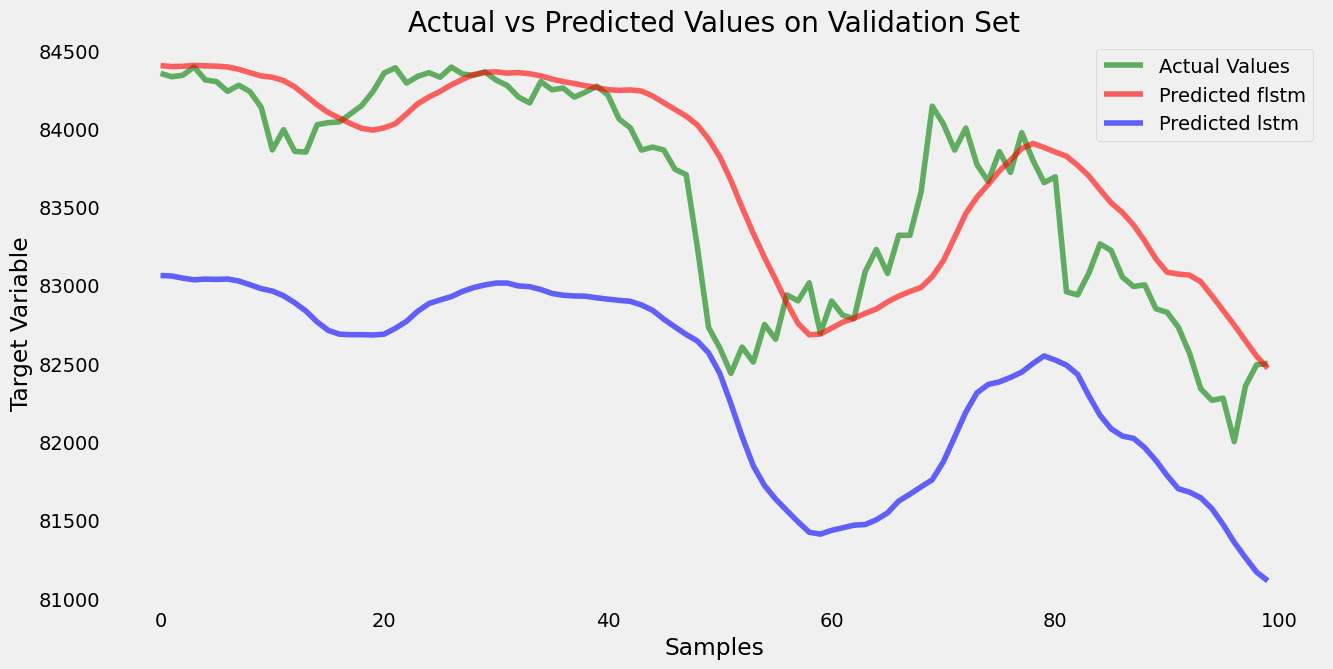

In [19]:
# Plotting the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_val_original, label='Actual Values', color='green', alpha=0.6)
plt.plot(flstm_y_pred_val_original, label='Predicted flstm', color='red', alpha=0.6)
plt.plot(lstm_y_pred_val_original, label='Predicted lstm', color='blue', alpha=0.6)

plt.title('Actual vs Predicted Values on Validation Set')
plt.xlabel('Samples')
plt.ylabel('Target Variable')
plt.legend()
plt.grid()
plt.show()